## EQ: What are the primary sources of energy in the US, and how has their usage evolved over time?

Primary energy sources include fossil fuels (petroleum, natural gas, and coal), nuclear energy, and renewable sources of energy. Electricity is a secondary energy source that is generated (produced) from primary energy sources.

In [1]:
import pandas as pd

df = pd.read_csv("primary-consumption-by-major-source.csv", skiprows=5)
df.rename(columns={"Unnamed: 0": "year", "natural gas": "natural_gas"}, inplace=True)
df.describe()

,year,coal,natural_gas,petroleum,nuclear,renewables
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1986.000000,15.580438,20.101397,30.818274,4.298877,5.894356
std,21.217131,4.408411,6.280393,7.454773,3.495050,2.591832
min,1950.000000,9.181000,5.968000,13.298000,0.000000,2.754000
25%,1968.000000,11.598000,17.221000,26.966000,0.142000,3.773000
50%,1986.000000,15.040000,20.678000,33.588000,4.380000,5.821000
75%,2004.000000,19.658000,23.223000,35.847000,8.062000,6.559000
max,2022.000000,22.797000,33.409000,40.217000,8.459000,13.177000


Text(0.5, 1.0, 'U.S. primary engergy consumption by major sources, 1950-2022')

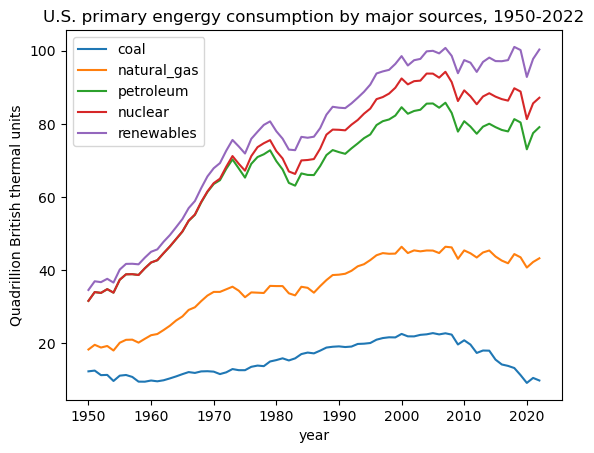

In [2]:
ax = df.set_index("year")[
    ["coal", "natural_gas", "petroleum", "nuclear", "renewables"]
].plot(kind="line", stacked=True)
ax.set_ylabel("Quadrillion British thermal units")
ax.set_title("U.S. primary engergy consumption by major sources, 1950-2022")

Text(0.5, 1.0, 'U.S. primary energy consumption proportion by major sources, 1950-2022')

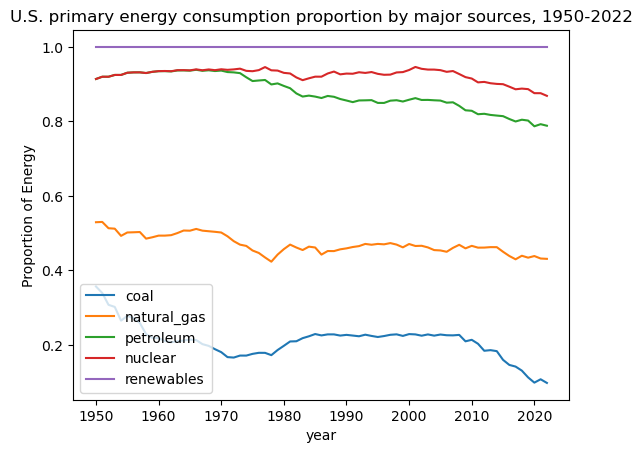

In [3]:
# Calculate the total energy produced each year
df["total"] = df[["coal", "natural_gas", "petroleum", "nuclear", "renewables"]].sum(
    axis=1
)

# Calculate the proportion of each energy source
for column in ["coal", "natural_gas", "petroleum", "nuclear", "renewables"]:
    df[column] = df[column] / df["total"]

# Drop the 'total' column as it's no longer needed
df.drop("total", axis=1, inplace=True)

# Plot the data
ax = df.set_index("year")[
    ["coal", "natural_gas", "petroleum", "nuclear", "renewables"]
].plot(kind="line", stacked=True)
ax.set_ylabel("Proportion of Energy")
ax.set_title("U.S. primary energy consumption proportion by major sources, 1950-2022")

Text(0.5, 1.0, 'U.S. primary energy consumption by energy source, 2022')

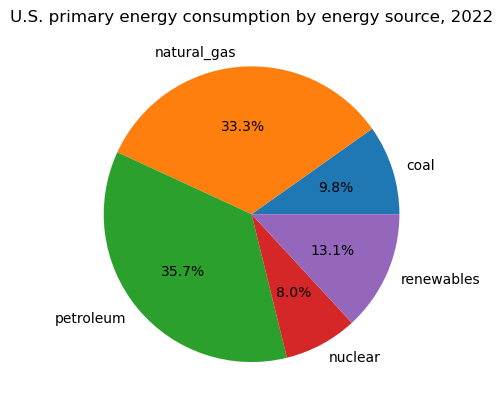

In [4]:
# plot a pie chart for year 2022

data_2022 = df[df["year"] == 2022]

# Sum up the values of the energy sources
energy_sources = data_2022[
    ["coal", "natural_gas", "petroleum", "nuclear", "renewables"]
].sum()

# Plot the pie chart
ax = energy_sources.plot(kind="pie", autopct="%1.1f%%")
ax.set_title("U.S. primary energy consumption by energy source, 2022")